In [1]:
# importing pandas and matplotlib dependencies
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing webscrapping dependencies
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

In [3]:
# setting up the Browser with Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [4]:
# navigate to the website in the browser and copy the relevant content
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html = browser.html
soup = soup(html, 'html.parser')

In [7]:
# locating the table data from the browser
data_table = soup.find('table', class_='table')
data_table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [9]:
# locating the table header
table_header = data_table.find_all('th')

headers=[]

for header in table_header:
    title=header.text
    headers.append(title)
    
headers

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [13]:
# adding table header list to a data frame
mars_data_df = pd.DataFrame(columns=headers)
mars_data_df

Empty DataFrame
Columns: [id, terrestrial_date, sol, ls, month, min_temp, pressure]
Index: []

In [15]:
# locating row data and adding them to the dataframe 
for row in data_table.find_all('tr',class_='data-row'):
        data = row.find_all('td')
        row_data=[td.text.strip() for td in data]
        lenghth=len(mars_data_df)
        mars_data_df.loc[lenghth]=row_data
        
mars_data_df

id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]

In [16]:
# quit the browing session 
browser.quit()

In [17]:
# inspect all data types
mars_data_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [18]:
# convert datatypes to appropriate datatypes
mars_data_df['id'] = mars_data_df['id'].astype(int)
mars_data_df['terrestrial_date'] = pd.to_datetime(mars_data_df['terrestrial_date'])
mars_data_df['sol'] = mars_data_df['sol'].astype(int)
mars_data_df['ls'] = mars_data_df['ls'].astype(int)
mars_data_df['month'] = mars_data_df['month'].astype(int)
mars_data_df['min_temp'] = mars_data_df['min_temp'].astype(float)
mars_data_df['pressure'] = mars_data_df['pressure'].astype(float)

# Check data types again 
mars_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 87.5 KB


In [22]:
# How many months exist on Mars?
no_of_months = mars_data_df['month'].nunique()
print(f" the number of months on Mars are {no_of_months} months")

 the number of months on Mars are 12 months


In [23]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
unique_days = mars_data_df['sol'].nunique()
print(f" there are {unique_days} unique days worth of martian data that exist from the scrapped data set.")

 there are 1867 unique days worth of martian data that exist from the scrapped data set.


In [24]:
# Obtaining the coldest and warmest temperatures on Mars on average
# Iterating through data to obtain the average minimum temperature for each month on Mars

avg_min_temp = []

for i in range( 1 ,no_of_months + 1):
    
    weather_per_month={"month_no":"","avg_min_temp":""}
    avg_min_temp_month= mars_data_df.loc[mars_data_df['month']==i]['min_temp'].mean()
    round_avg_min_temp_month = round(avg_min_temp_month,0)
    weather_per_month["month_no"] = i
    weather_per_month["avg_min_temp"] = round_avg_min_temp_month
    avg_min_temp.append(weather_per_month)    

print(avg_min_temp)  

[{'month_no': 1, 'avg_min_temp': -77.0}, {'month_no': 2, 'avg_min_temp': -80.0}, {'month_no': 3, 'avg_min_temp': -83.0}, {'month_no': 4, 'avg_min_temp': -83.0}, {'month_no': 5, 'avg_min_temp': -79.0}, {'month_no': 6, 'avg_min_temp': -75.0}, {'month_no': 7, 'avg_min_temp': -72.0}, {'month_no': 8, 'avg_min_temp': -68.0}, {'month_no': 9, 'avg_min_temp': -69.0}, {'month_no': 10, 'avg_min_temp': -72.0}, {'month_no': 11, 'avg_min_temp': -72.0}, {'month_no': 12, 'avg_min_temp': -74.0}]


In [26]:
# Export python dictionary to JSON file
import json
json_mars = json.dumps(avg_min_temp)
print(json_mars)

[{"month_no": 1, "avg_min_temp": -77.0}, {"month_no": 2, "avg_min_temp": -80.0}, {"month_no": 3, "avg_min_temp": -83.0}, {"month_no": 4, "avg_min_temp": -83.0}, {"month_no": 5, "avg_min_temp": -79.0}, {"month_no": 6, "avg_min_temp": -75.0}, {"month_no": 7, "avg_min_temp": -72.0}, {"month_no": 8, "avg_min_temp": -68.0}, {"month_no": 9, "avg_min_temp": -69.0}, {"month_no": 10, "avg_min_temp": -72.0}, {"month_no": 11, "avg_min_temp": -72.0}, {"month_no": 12, "avg_min_temp": -74.0}]


In [27]:
# save the json format file into a dataframe
min_temp_df = pd.read_json(json_mars)
min_temp_df

month_no  avg_min_temp
0          1           -77
1          2           -80
2          3           -83
3          4           -83
4          5           -79
5          6           -75
6          7           -72
7          8           -68
8          9           -69
9         10           -72
10        11           -72
11        12           -74

the coldest months on Mars is month 3 and month 4 at -83
the warmest month on Mars is month 8 at -68


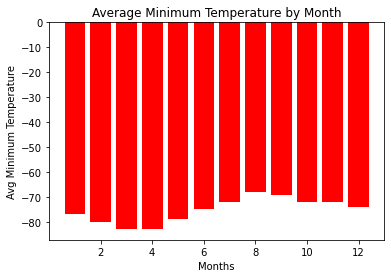

In [30]:
# Plot the average min temperatue on Mars by month

plt.bar(min_temp_df['month_no'],min_temp_df['avg_min_temp'], color='red')

# Create labels for the x and y axes.
plt.xlabel("Months")
plt.ylabel("Avg Minimum Temperature")

# Create title 
plt.title('Average Minimum Temperature by Month')

# Print the warmest and coldest months in Mars by average minimum temperatue
print(f"the coldest months on Mars is month 3 and month 4 at -83")
print(f"the warmest month on Mars is month 8 at -68")

In [32]:
# Obtaining the lowest and highest atmospheric pressures on Mars on average
# Grouping the dataframe by the average of pressure for each month

month_df = mars_data_df.groupby('month')
atm_psi_df = month_df.mean().loc[:,['pressure']]
atm_psi_df

pressure
month            
1      862.488506
2      889.455056
3      877.322917
4      806.329897
5      748.557047
6      745.054422
7      795.105634
8      873.829787
9      913.305970
10     887.312500
11     857.014493
12     842.156627

the lowest atmospheric pressure on Mars is at month 6 at 745.054422
the highest atmospheric pressure on Mars is at month 9 at 913.305970


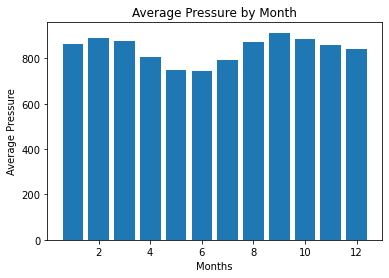

In [35]:
# Plot the average atmospheric pressure on Mars by month
x = range(1,13)
plt.bar(x, atm_psi_df['pressure'])

# Create labels for the x and y axes.
plt.xlabel("Months")
plt.ylabel("Average Pressure")

# Create title 
plt.title('Average Pressure by Month')

# Print the lowest and highest months in Mars by average atmospheric pressure
print(f"the lowest atmospheric pressure on Mars is at month 6 at 745.054422")
print(f"the highest atmospheric pressure on Mars is at month 9 at 913.305970")

In [36]:
# About how many terrestrial (Earth) days exist in a Martian year?
original_long = mars_data_df['ls'].loc[0]
original_long

155

In [37]:
# Determining where original longitude is the same as others
recurring_long = mars_data_df.loc[mars_data_df['ls'] == original_long]
recurring_long

id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
598    621       2014-07-03   678  155      6     -77.0     739.0
599    624       2014-07-04   679  155      6     -77.0     738.0
1249  1274       2016-05-20  1346  155      6     -75.0     737.0
1250  1277       2016-05-21  1347  155      6     -75.0     736.0

In [38]:
# Determining time elapsed on earth for one martian year
import datetime as dt
from datetime import timedelta
from datetime import datetime

In [42]:
starting_date = recurring_long['terrestrial_date'].loc[0]
date_after_one_martian_year = recurring_long['terrestrial_date'].iloc[1]
elapsed_earth_days = date_after_one_martian_year - starting_date
print(f'In one Martian year nearly {elapsed_earth_days} pass on Earth')

In one Martian year nearly 686 days 00:00:00 pass on Earth


Text(0.5, 1.0, 'Daily Minimum Temperature')

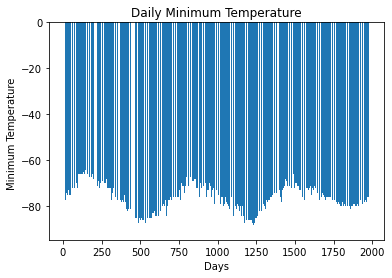

In [43]:
# Plotting the minimum temperature vs Martian Days 
plt.bar(mars_data_df['sol'],mars_data_df['min_temp'])

# Create Title and labels for the x and y axis.
plt.xlabel("Days")
plt.ylabel("Minimum Temperature ")
plt.title('Daily Minimum Temperature')

In [44]:
# Export the DataFrame to a CSV file
mars_data_df.to_csv('mars_data_table.csv',index=False)